# Importar bibliotecas

Aquí importamos todas las bibliotecas necesarias para el proyecto. Esto incluye bibliotecas para manipulación de datos, aprendizaje automático y visualización.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Generar datos de ejemplo

Generamos un conjunto de datos de ejemplo para simular un escenario real. Este conjunto de datos incluye varias características que son comunes en los perfiles de Twitter, como el número de seguidores, el número de estados y si la cuenta está verificada o no.

In [5]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('users_final_processed.csv', delimiter='\t')

# Mostrar las primeras filas del conjunto de datos para tener una idea de la estructura
df.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,...,tweets_count,average_sentiment,hashtags_per_tweet,mentions_per_tweet,duplicate_content_ratio,is_fake,account_age,tweet_frequency,average_activity_time,text_to_image_ratio
0,1505615838518333446,Personaldata.info,personal_data1,0.000161,0.000022,0.000723,0.005467,0.000553,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-1.0,-1.0
1,21862091,personal jesus,sentiny,0.001966,0.000023,0.001028,0.002471,0.000000,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-1.0,-1.0
2,1629321749086244864,Sindel's personal foot stool 🙇🏻‍♂️,Oneandonlysir1,0.000364,0.000010,0.001115,0.004361,0.000040,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-1.0,-1.0
3,994324172154130432,ytywrld (personal account),JimmyYitty,0.002350,0.000011,0.001707,0.021768,0.000040,True,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-1.0,-1.0
4,385133876,Personal Branding Expert Dubai,girlnamedrobyn,0.000585,0.000022,0.000526,0.000180,0.000869,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-1.0,-1.0


# Preprocesamiento de datos

En esta sección, realizamos el preprocesamiento de los datos. Esto incluye dividir el conjunto de datos en conjuntos de entrenamiento y prueba, y normalizar las características.

Columnas:
```
id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,lang,time_zone,location,description,account_age_days,retweet_ratio,duplicate_content_ratio,mentions_per_tweet,hashtags_per_tweet,urls_per_tweet,sensitive_words_count,automation_level,sentiment_uniformity,directed_tweets_ratio,bidirectional_conversations,profile_images_count,email_verified,phone_verified,is_fake
```

In [6]:
# Define numerical and categorical features
numerical_features = [
    'statuses_count', 'followers_count', 'friends_count', 
    'favourites_count', 'listed_count', 'followers_to_following_ratio', 
    'media_count', 'response_count', 'retweet_ratio', 
    'engagement_rate', 'tweets_count', 'average_sentiment', 
    'hashtags_per_tweet', 'mentions_per_tweet',
    'duplicate_content_ratio', 'account_age', 
    'tweet_frequency', 'average_activity_time', 'text_to_image_ratio'
]

categorical_features = [
    'default_profile', 'default_profile_image', 
    'verified', 'is_blue_verified', 'can_dm', 
    'has_custom_timelines', 'possibly_sensitive', 
    'verified_type', 'has_verification_info'
]

# Combine all features
all_features = numerical_features + categorical_features
# Separate features and target variable from the dataset
X = df[all_features]
y = df['is_fake']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de Random Forest

Utilizamos un modelo de Random Forest para entrenar nuestro clasificador. Este modelo es apto para manejar una variedad de tipos de datos y es fácilmente interpretable, lo que lo hace ideal para nuestro uso.

In [7]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))])

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['statuses_count',
                                                   'followers_count',
                                                   'friends_count',
                                                   'favourites_count',
                                                   'listed_count',
                                                   'followers_to_following_ratio',
                                                   'media_count',
                                                   'response_count',
                                                   'retweet_ratio',
                                                   'engagement_rate',
                                                   'tweets_count',
                                                   'average_sentiment',
                                                   'hashtags_per_tweet',
                                                   'mentions_per_tweet',
                                                   'du...
                                                   'tweet_frequency',
                                                   'average_activity_time',
                                                   'text_to_image_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['default_profile',
                                                   'default_profile_image',
                                                   'verified',
                                                   'is_blue_verified', 'can_dm',
                                                   'has_custom_timelines',
                                                   'possibly_sensitive',
                                                   'verified_type',
                                                   'has_verification_info'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

# Evaluación del modelo

Después de entrenar el modelo, lo evaluamos utilizando el conjunto de datos de prueba. Utilizamos varias métricas, como la precisión y el F1 Score, para medir el rendimiento del modelo.

In [8]:
# Predict the labels
y_pred = pipeline.predict(X_test)

# Calculate the accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy', accuracy)
print('F1 Score', f1)

Accuracy 0.7800829875518672
F1 Score 0.6535947712418302


# Matriz de confusión

La matriz de confusión nos da una visión más detallada del rendimiento del modelo, mostrándonos los verdaderos positivos, los verdaderos negativos, los falsos positivos y los falsos negativos.

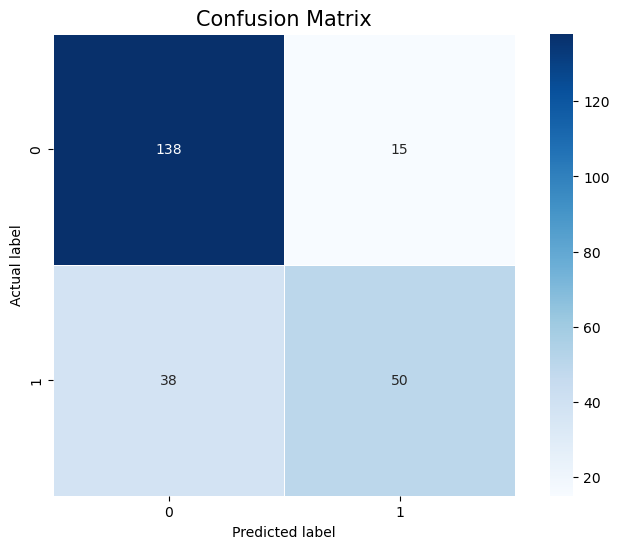

In [12]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()

# Curva ROC

La Curva Característica de Operación del Receptor (ROC) es otra herramienta para evaluar la calidad de nuestro modelo de clasificación. El Área Bajo la Curva (AUC) nos da una sola métrica para comparar modelos.

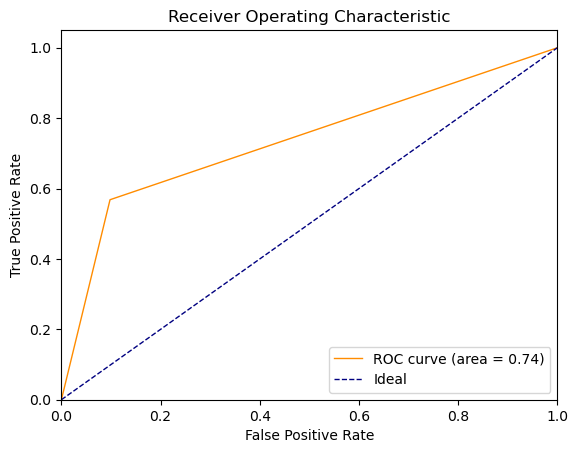

In [18]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Ideal')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importancia de las Características

Este gráfico te muestra qué variables son las más importantes en las decisiones del árbol.

Length of all_feature_names: 174
Length of feature_importances: 174


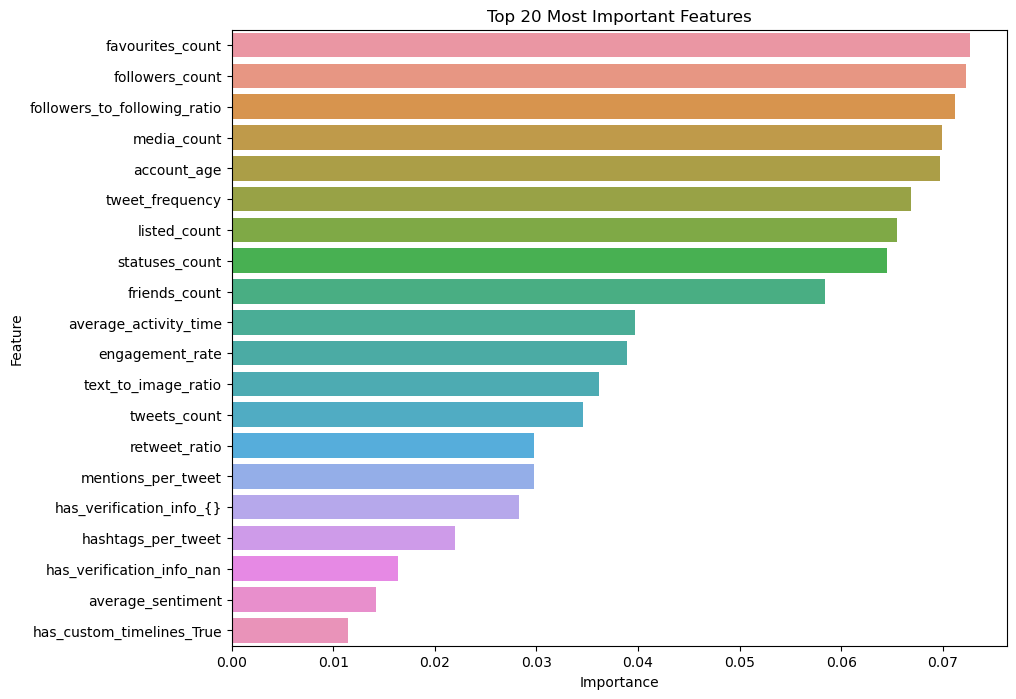

In [25]:
# Obtener las características después de la transformación
transformed_feature_names = (pipeline.named_steps['preprocessor']
                             .named_transformers_['cat']
                             .get_feature_names_out(non_numerical_features))

# Juntar todo en una sola lista de características
all_feature_names = numerical_features + list(transformed_feature_names)

# Verificar que la longitud coincide con la importancia de las características
print(f"Length of all_feature_names: {len(all_feature_names)}")
print(f"Length of feature_importances: {len(feature_importances)}")

# Crear un DataFrame para la importancia de las características
if len(all_feature_names) == len(feature_importances):
    feature_importances_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
else:
    print("The lengths do not match. The DataFrame cannot be created.")

# Ordenar las características por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(20))
plt.title('Top 20 Most Important Features')
plt.show()


# Árboles Individuales

Aunque un Random Forest consta de múltiples árboles, puedes visualizar árboles individuales para entender cómo toman decisiones.

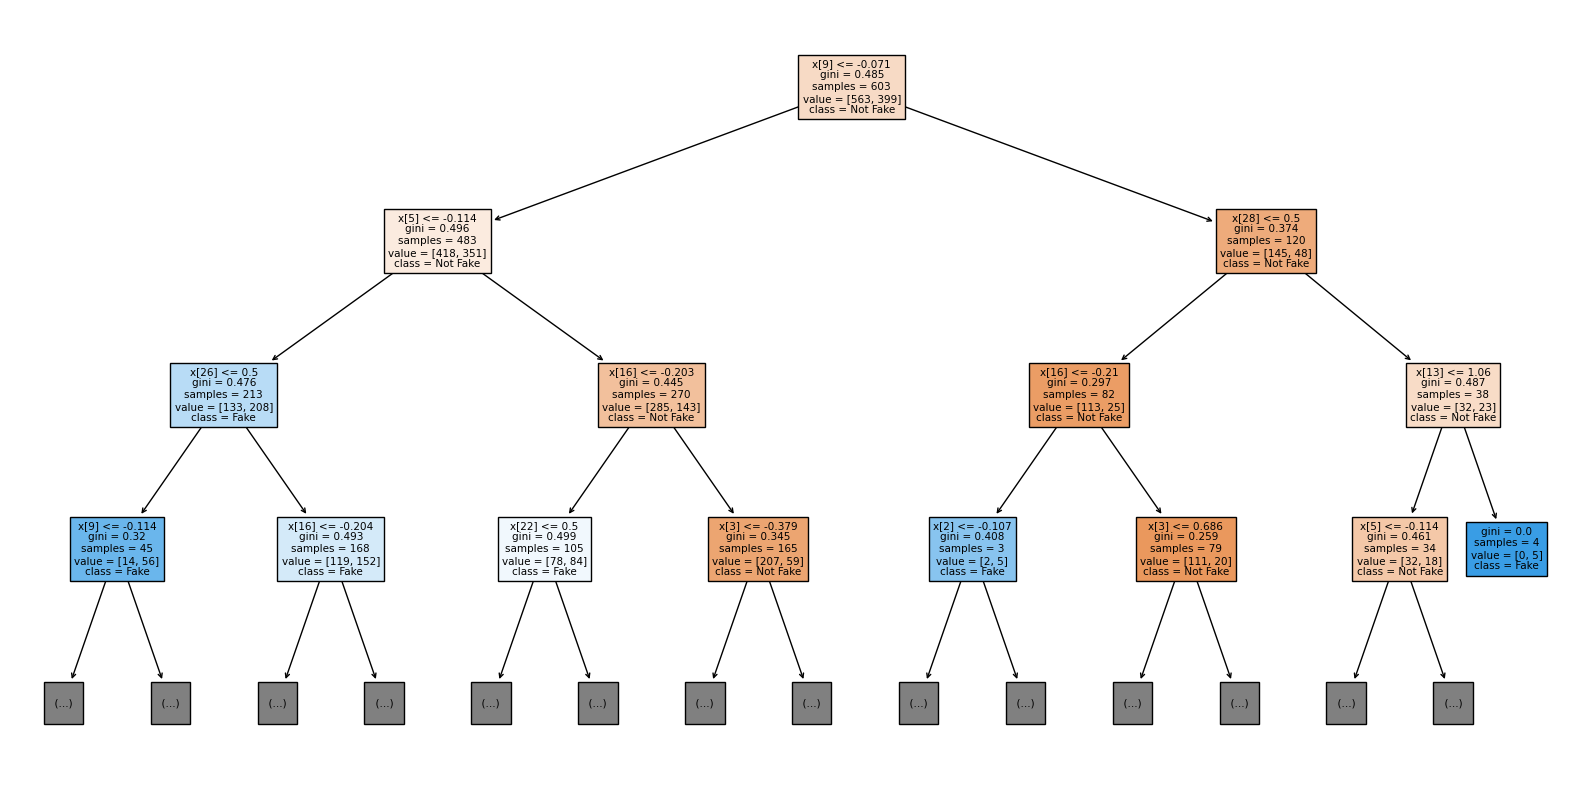

In [30]:
# Visualizar uno de los árboles del modelo de Random Forest
single_tree = pipeline.named_steps['classifier'].estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(single_tree, filled=True, class_names=['Not Fake', 'Fake'], max_depth=3)
plt.show()

# Curva de Precisión-Recall

 Similar a la Curva ROC, pero se centra en la precisión y el recall en lugar de la tasa de verdaderos positivos y la tasa de falsos positivos. Es especialmente útil cuando las clases están muy desequilibradas.

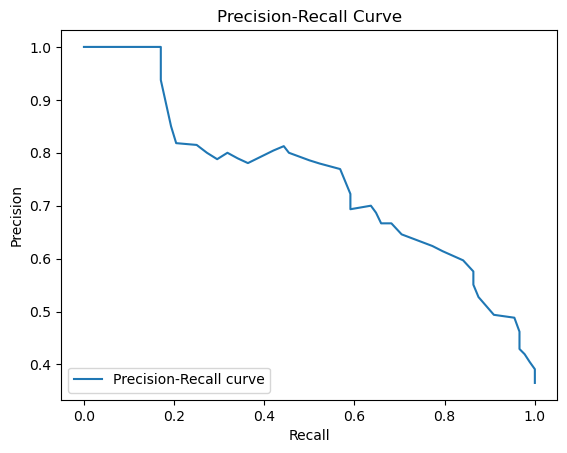

In [31]:
from sklearn.metrics import precision_recall_curve

y_scores = pipeline.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


# Seccion test manual

In [34]:
# Updating the example profile dictionary to include features used in the latest model

perfil_ejemplo_actualizado = {
    'statuses_count': [200],
    'followers_count': [150],
    'friends_count': [100],
    'favourites_count': [50],
    'listed_count': [2],
    'media_count': [10],
    'response_count': [5],
    'tweets_count': [1000],
    'default_profile': [1],
    'default_profile_image': [0],
    'verified': [0],
    'is_blue_verified': [0],
    'can_dm': [1],
    'has_custom_timelines': [0],
    'location': ['New York'],
    'description': ['Love coding and tech stuff'],
    'description_has_url': [0],
    'description_url': [''],
    'followers_to_following_ratio': [1.5],
    'verified_type': ['none'],
    'has_verification_info': ['no'],
    'possibly_sensitive': [0],
    'profile_image_url_https': ['https://example.com/image.jpg'],
    'created_at': ['2022-01-01'],
    'retweet_ratio': [0.2],
    'engagement_rate': [0.5],
    'top_words': ['coding, tech'],
    'average_sentiment': [0.5],
    'hashtags_per_tweet': [0.2],
    'mentions_per_tweet': [0.3],
    'duplicate_content_ratio': [0.1],
    'account_age': [365],
    'tweet_frequency': [2.7],
    'average_activity_time': [12.5],
    'text_to_image_ratio': [1.5]

}

# Convert the updated dictionary to a DataFrame
perfil_ejemplo_actualizado_df = pd.DataFrame.from_dict(perfil_ejemplo_actualizado)



# Use the trained model to make a prediction
prediccion_actualizada = pipeline.predict(perfil_ejemplo_actualizado_df)

if prediccion_actualizada[0] == 0:
    print("El perfil es legítimo según el modelo.")
else:
    print("El perfil es falso según el modelo.")

El perfil es falso según el modelo.


In [36]:
import joblib

# Guardar el modelo
joblib.dump(pipeline, 'profile-detection-model.pkl')

# Para cargar el modelo más tarde
# loaded_model = joblib.load('random_forest_model.pkl')


['profile-detection-model.pkl']